# Fine-tuning SpeechT5 for Persian TTS

Speech Processing. Homework `5` Notebook.

- `NAME:Leili Motahari`
- `SID:`

In this notebook we will start from an existing TTS [SpeechT5](https://arxiv.org/abs/2110.07205) model that was originally trained on English speech from LibriTTS, and fine-tune it for the [persian mozila dataset](https://huggingface.co/datasets/fsicoli/common_voice_17_0).

- You can read this [documentation](https://huggingface.co/learn/audio-course/en/chapter6/fine-tuning) from huggingface about Fine-tuning SpeechT5 for another language.

## Install required packages



In [ ]:
!pip install datasets soundfile speechbrain
!pip install git+https://github.com/huggingface/transformers.git
!pip install --upgrade accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from IPython import display
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech
from transformers import SpeechT5HifiGan
from datasets import load_dataset, Audio

## Load the model


In [ ]:
processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

## Load the dataset

In [ ]:
!pip uninstall -y datasets
!rm -rf /root/.cache/huggingface/datasets
!pip install --upgrade datasets
from datasets import load_dataset

ds = load_dataset('mohammadhossein/SP_HW5_PersianTTS')
ds

Found existing installation: datasets 2.14.4
Uninstalling datasets-2.14.4:
  Successfully uninstalled datasets-2.14.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


README.md:   0%|          | 0.00/538 [00:00<?, ?B/s]

train-00000-of-00010.parquet:   0%|          | 0.00/469M [00:00<?, ?B/s]

train-00001-of-00010.parquet:   0%|          | 0.00/460M [00:00<?, ?B/s]

train-00002-of-00010.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

train-00003-of-00010.parquet:   0%|          | 0.00/466M [00:00<?, ?B/s]

train-00004-of-00010.parquet:   0%|          | 0.00/402M [00:00<?, ?B/s]

train-00005-of-00010.parquet:   0%|          | 0.00/399M [00:00<?, ?B/s]

train-00006-of-00010.parquet:   0%|          | 0.00/387M [00:00<?, ?B/s]

train-00007-of-00010.parquet:   0%|          | 0.00/544M [00:00<?, ?B/s]

train-00008-of-00010.parquet:   0%|          | 0.00/442M [00:00<?, ?B/s]

train-00009-of-00010.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

val-00000-of-00003.parquet:   0%|          | 0.00/409M [00:00<?, ?B/s]

val-00001-of-00003.parquet:   0%|          | 0.00/412M [00:00<?, ?B/s]

val-00002-of-00003.parquet:   0%|          | 0.00/418M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/41604 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/10559 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['client_id', 'audio', 'sentence', 'text'],
        num_rows: 41604
    })
    val: Dataset({
        features: ['client_id', 'audio', 'sentence', 'text'],
        num_rows: 10559
    })
})

In [ ]:
from IPython.display import Audio
Audio(ds['train'][0]['audio']['array'], rate=16000)

Let's quickly check how many examples are in this dataset.

## Clean up the text


In [ ]:
tokenizer = processor.tokenizer

In [ ]:
def extract_all_chars(batch):
    all_text = " ".join(batch["text"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}

vocabs = ds['train'].map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=ds['train'].column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k,_ in tokenizer.get_vocab().items()}

Map:   0%|          | 0/41604 [00:00<?, ? examples/s]

Now we have two sets of characters, one with the vocabulary from the dataset and one with the vocabulary from the tokenizer. By taking the difference between these sets, we find the characters that are in the dataset but not in the tokenizer.

In [ ]:
tokenizer_vocab

{'!',
 '"',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '</s>',
 '<ctc_blank>',
 '<mask>',
 '<pad>',
 '<s>',
 '<unk>',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '}',
 'æ',
 'é',
 'ê',
 'œ',
 '̄',
 '—',
 '▁'}

In [ ]:
dataset_vocab - tokenizer_vocab

{'\n', ' ', '$', '1', '@'}

Next, we will define a function to map these characters to valid tokens and then run it on the dataset. No need to handle space, that's already replaced by `▁` in the tokenizer.

In [ ]:
replacements = [
    ('1', 'é'),
    ('@', 'æ'),
    ('$', 'sh'),
]

def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["text"] = inputs["text"].replace(src, dst)
    return inputs

dataset = ds.map(cleanup_text)

Map:   0%|          | 0/41604 [00:00<?, ? examples/s]

Map:   0%|          | 0/10559 [00:00<?, ? examples/s]

## Speakers

In [ ]:
from collections import defaultdict
speaker_counts = defaultdict(int)

for speaker_id in dataset['train']["client_id"]:
    speaker_counts[speaker_id] += 1

By plotting a histogram we can get a sense of how much data there is for each speaker.

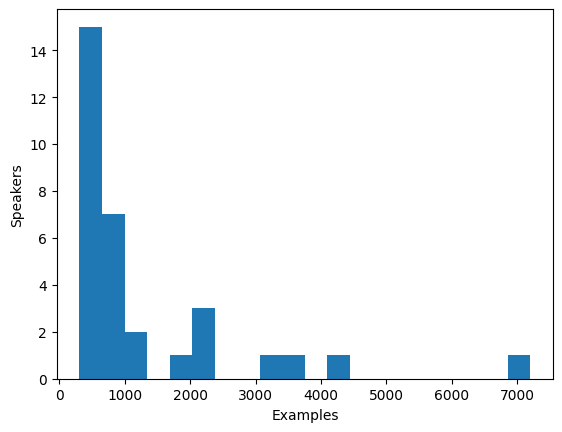

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(speaker_counts.values(), bins=20)
plt.ylabel("Speakers")
plt.xlabel("Examples")
plt.show()

How many speakers remain?

In [ ]:
len(set(dataset['train']["client_id"]))

32

And how many examples?

In [ ]:
len(dataset['train'])

41604

## Speaker embeddings



To create the speaker embeddings, we use the [spkrec-xvect-voxceleb](https://huggingface.co/speechbrain/spkrec-xvect-voxceleb) model from SpeechBrain. The following defines a function `create_speaker_embedding()` that takes an input audio waveform and outputs a 512-element vector containing the corresponding speaker embedding.

In [ ]:
import os
import torch
from speechbrain.inference.speaker import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name)
)

def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover
INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/spkrec-xvect-voxceleb' if not cached


hyperparams.yaml: 0.00B [00:00, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--spkrec-xvect-voxceleb/snapshots/56895a2df401be4150a159f3a1c653f00051d477/hyperparams.yaml' -> '/tmp/speechbrain/spkrec-xvect-voxceleb/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-xvect-voxceleb' if not cached
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _load
DEBUG:speechbrain.utils.checkpoints:Registered parameter transfer hook for _load
/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook fo

embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--spkrec-xvect-voxceleb/snapshots/56895a2df401be4150a159f3a1c653f00051d477/embedding_model.ckpt' -> '/tmp/speechbrain/spkrec-xvect-voxceleb/embedding_model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["embedding_model"] = /tmp/speechbrain/spkrec-xvect-voxceleb/embedding_model.ckpt
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-xvect-voxceleb' if not cached


mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--spkrec-xvect-voxceleb/snapshots/56895a2df401be4150a159f3a1c653f00051d477/mean_var_norm_emb.ckpt' -> '/tmp/speechbrain/spkrec-xvect-voxceleb/mean_var_norm_emb.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["mean_var_norm_emb"] = /tmp/speechbrain/spkrec-xvect-voxceleb/mean_var_norm_emb.ckpt
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-xvect-voxceleb' if not cached


classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--spkrec-xvect-voxceleb/snapshots/56895a2df401be4150a159f3a1c653f00051d477/classifier.ckpt' -> '/tmp/speechbrain/spkrec-xvect-voxceleb/classifier.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["classifier"] = /tmp/speechbrain/spkrec-xvect-voxceleb/classifier.ckpt
INFO:speechbrain.utils.fetching:Fetch label_encoder.txt: Fetching from HuggingFace Hub 'speechbrain/spkrec-xvect-voxceleb' if not cached


label_encoder.txt: 0.00B [00:00, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--spkrec-xvect-voxceleb/snapshots/56895a2df401be4150a159f3a1c653f00051d477/label_encoder.txt' -> '/tmp/speechbrain/spkrec-xvect-voxceleb/label_encoder.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["label_encoder"] = /tmp/speechbrain/spkrec-xvect-voxceleb/label_encoder.ckpt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: embedding_model, mean_var_norm_emb, classifier, label_encoder
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): embedding_model -> /tmp/speechbrain/spkrec-xvect-voxceleb/embedding_model.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): mean_var_norm_emb -> /tmp/speechbrain/spkrec-xvect-voxceleb/mean_var_norm_emb.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): classifier -> /tmp/speechbra

Note: the `speechbrain/spkrec-xvect-voxceleb` model was trained on English speech from the VoxCeleb dataset.

## Preparing the dataset

The `prepare_dataset` function takes in a single example and uses the `SpeechT5Processor` object to tokenize the input text and load the target audio into a log-mel spectrogram. It also adds the speaker embeddings as an additional input.

In [ ]:
def remove_nonsense_voice(audio):
  return len(audio['array']) < 320000

dataset = dataset.filter(remove_nonsense_voice, input_columns=["audio"])

Filter:   0%|          | 0/41604 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10559 [00:00<?, ? examples/s]

In [ ]:
import scipy.io.wavfile as wavfile
def prepare_dataset(example):
    # load the audio data; if necessary, this resamples the audio to 16kHz
    audio = example["audio"]

    # feature extraction and tokenization
    example = processor(
        text=example["text"],
        audio_target = audio['array'],
        sampling_rate = audio['sampling_rate'],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio['array'])

    return example

Let's verify the processing is correct by looking at a single example:

In [ ]:
dataset['train'][0]

{'client_id': '00243bfe65b613056abfcfc01852fe62351a6c337b75edde51a8a34aad37035cb3490a828ee36934598c1b4afd2966f2a0812ecd3ba39616a459484b1afbe721',
 'audio': {'path': None,
  'array': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.52587891e-04, -2.13623047e-04,  6.10351562e-05]),
  'sampling_rate': 16000},
 'sentence': 'نه، اون چيز قشنگي هست',
 'text': 'noh æun cizeé q/sh/ngi h/st'}

In [ ]:
processed_example = prepare_dataset(dataset['train'][0])

This should give us:

- the tokens for the input text in `input_ids`
- the speaker embedding in `speaker_embeddings`
- the target spectrogram in `labels`

In [ ]:
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

The tokens should decode into the original text, with `</s>` to mark the end of the sentence.

In [ ]:
tokenizer.decode(processed_example["input_ids"])

'noh æun cizeé q/sh/ngi h/st</s>'

Speaker embeddings should be a 512-element vector:

In [ ]:
processed_example["speaker_embeddings"].shape

(512,)

The labels should be a log-mel spectrogram with 80 mel bins.

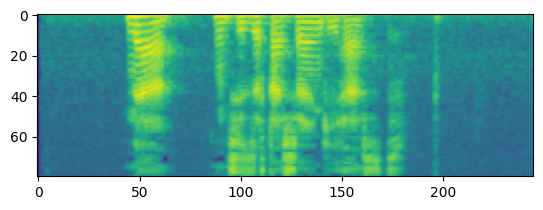

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

If we run a vocoder on the log-mel spectrogram, it should produce the original audio again. We'll load the HiFi-GAN vocoder from the original [SpeechT5 checkpoint](https://hf.co/microsoft/speecht5_hifigan).

In [ ]:
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [ ]:
spectrogram = torch.tensor(processed_example["labels"])
with torch.no_grad():
    speech = vocoder(spectrogram)

model.safetensors:   0%|          | 0.00/50.6M [00:00<?, ?B/s]

In [ ]:
from IPython.display import Audio
Audio(speech.cpu().numpy(), rate=16000)

That all looks and sounds good! We can now process the entire dataset. This will take between 10 and 20 minutes.

In [ ]:
dataset = dataset.map(
    prepare_dataset, remove_columns=dataset['train'].column_names,
)

Map:   0%|          | 0/41550 [00:00<?, ? examples/s]

Map:   0%|          | 0/10559 [00:00<?, ? examples/s]

Some of the examples in the dataset are apparently longer than the maximum input length the model can handle (600 tokens), so we should remove those from the dataset. In fact, to allow for larger batch sizes we'll remove anything over 200 tokens.

In [ ]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200

dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])

Filter:   0%|          | 0/41550 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10559 [00:00<?, ? examples/s]

How many examples are left?

In [ ]:
print('Num Train Examples: ' , len(dataset['train']))
print('Num validation Examples: ' , len(dataset['val']))

Num Train Examples:  41549
Num validation Examples:  10558


## Collator to make batches

We need to define a custom collator to combine multiple examples into a batch. This will pad shorter sequences with padding tokens. For the spectrogram labels, the padded portions are replaced with the special value -100. This special value tells the model to ignore that part of the spectrogram when calculating the spectrogram loss.


In [ ]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:

        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids,
            labels=label_features,
            return_tensors="pt",

        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]


        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor([
                len(feature["input_values"]) for feature in label_features
            ])
            target_lengths = target_lengths.new([
                length - length % model.config.reduction_factor for length in target_lengths
            ])
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In SpeechT5, the input to the decoder part of the model is reduced by a factor 2. In other words, it throws away every other timestep from the target sequence. The decoder then predicts a sequence that is twice as long. Since the original target sequence length may be odd, the data collator makes sure to round the maximum length of the batch down to be a multiple of 2.

In [ ]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

Let's test the data collator.

In [ ]:
features = [
    dataset["train"][0],
    dataset["train"][10],
    dataset["train"][20],
]

batch = data_collator(features)

In [ ]:
{k:v.shape for k,v in batch.items()}

{'input_ids': torch.Size([3, 29]),
 'attention_mask': torch.Size([3, 29]),
 'labels': torch.Size([3, 244, 80]),
 'speaker_embeddings': torch.Size([3, 512])}

Looks good!

### TASK (15 pts)

* First let's establish a baseline for performance on this dataset.

In [ ]:
import torch
from datasets import load_dataset
from transformers import (
    SpeechT5Processor,
    SpeechT5ForTextToSpeech,
    SpeechT5HifiGan
)
from IPython.display import Audio, display

device = "cuda" if torch.cuda.is_available() else "cpu"
raw_ds = load_dataset("mohammadhossein/SP_HW5_PersianTTS")

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
tts_model = (
    SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")
    .to(device)
    .eval()
)

vocoder = (
    SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")
    .to(device)
    .eval()
)

def synthesize(text: str, speaker_embedding: torch.Tensor):

    inputs = processor(text=[text], return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        spec = tts_model.generate_speech(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            speaker_embeddings=speaker_embedding.unsqueeze(0).to(device),
        )

    with torch.no_grad():
        wav = vocoder(spec)

    return wav.squeeze().cpu().numpy()


for split in ["train", "val"]:

    print(f"\n===== {split.upper()} EXAMPLES =====\n")
    for idx in range(10):

        text = raw_ds[split][idx]["text"]
        emb = torch.tensor(dataset[split][idx]["speaker_embeddings"], dtype=torch.float32)
        wav = synthesize(text, emb)
        print(f"[{split} #{idx}] {text}")
        display(Audio(wav, rate=16000))



===== TRAIN EXAMPLES =====

[train #0] noh @un cize1 q/$/ngi h/st


[train #1] @/ziz/m neg/ran n/ba$


[train #2] maliyat ro do b/rab/r/$ kon


[train #3] cera h/m/$ donbale1 m/ni


[train #4] m/n/m h/minkaro mik/n/m


[train #5] bebin q/ziye @/z @in q/rare


[train #6] qorube zendeye niyoyork nist


[train #7] bexatere m/n bixiyal/$ $od


[train #8] @at v/ @e$qalhaye xiyaban


[train #9] b/raye moqayese be riyal t/bdil n/konin



===== VAL EXAMPLES =====

[val #0] h/lleye holeye @engelisi moz/xr/f


[val #1] c/hard/h @emtiyaz darim v/ ba time sevvome j/dv/l f/q/t do @emtiyaz fasele darim


[val #2] mif/hmi ke m/nzur/m ciye


[val #3] $/lvar k/rdi pu$id/naye q/bl v/ b/@d @/z to sutfahomi bi$ nist


[val #4] ye kiff h/m d/st migire


[val #5] @un xeyli b/d masa; meyde


[val #6] v/ ya bejaye @an konjkavi ra jaygozine1 dav/ri kon/m


[val #7] @ensan b/nabe t/hqiqate1 xod ra d/st bala migir/d d/r t/vana@i be xater @av/rd/ne1 d/qayeqe1 mohemme1 @ehsasi p/s @/z goz/$te1 modd/tz/mani


[val #8] ye mad/r$oh/rdar/m b/ram lubiya xordd k/rde v/ ba gojef/r/ngi r/nde $ode poxte v/ dade behem ta moqe@ dorost k/rd/n/$ rah/t ba$/m


[val #9] hala do d/lil vojud dare


## TASK: HuggingFace Trainer (30 pts)

The `use_cache=True` option is incompatible with gradient checkpointing.

In [ ]:
model.config.use_cache = False

Define the training arguments.

We won't be computing any evaluation metrics during the training process. Instead, we'll only look at the loss. The lower the loss, the better the model.

In [ ]:
from transformers import Seq2SeqTrainingArguments
from transformers import Seq2SeqTrainer

# Create the trainer object using the model, dataset, and data collator.
#############################
#### YOUR CODE GOES HERE ####

#############################
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

# 1. تعریف training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="persian_speecht5_checkpoints",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    num_train_epochs=5,
    learning_rate=3e-5,
    fp16=torch.cuda.is_available(),
    logging_steps=100,
    save_steps=1000,
    eval_steps=1000,
    save_total_limit=3,
    predict_with_generate=False,
    remove_unused_columns=False,
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["val"],
    data_collator=TTSDataCollatorWithPadding(processor=processor),
)


### TASK: Custom Trainer (50 pts)

In [ ]:
train_loader =  DataLoader(
        dataset['train'],
        batch_size=4,
        shuffle=True,
        collate_fn=data_collator,
        drop_last=True
    )

val_loader = DataLoader(
        dataset['val'],
        batch_size=4,
        shuffle=False,
        collate_fn=data_collator,
        drop_last=True
    )


In [ ]:
def train_loop(model, loader, optimizer):

    #############################
    #### YOUR CODE GOES HERE ####

    #############################

    return {'train_loss': loss_value}



def valid_loop(model, loader):
    #############################
    #### YOUR CODE GOES HERE ####

    #############################

    return {'val_loss': loss_value}


import torch

def train_loop(model, loader, optimizer, scheduler=None, device="cuda"):
    model.train()
    total_loss = 0.0
    num_batches = 0

    for batch in loader:

        batch = {k: v.to(device) for k, v in batch.items()}

        optimizer.zero_grad()

        outputs = model(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
            speaker_embeddings=batch["speaker_embeddings"],
            labels=batch["labels"],
        )
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        if scheduler is not None:
            scheduler.step()

        total_loss += loss.item()
        num_batches += 1

    avg_loss = total_loss / num_batches if num_batches > 0 else 0.0
    return {"train_loss": avg_loss}


def valid_loop(model, loader, device="cuda"):
    model.eval()
    total_loss = 0.0
    num_batches = 0

    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}

            outputs = model(
                input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                speaker_embeddings=batch["speaker_embeddings"],
                labels=batch["labels"],
            )
            loss = outputs.loss

            total_loss += loss.item()
            num_batches += 1

    avg_loss = total_loss / num_batches if num_batches > 0 else 0.0
    return {"val_loss": avg_loss}


In [ ]:
# EPOCHS =              # TODO
# LEARNING_RATE =       # TODO
EPOCHS = 5
LEARNING_RATE = 3e-5
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)

In [ ]:
small_train = dataset["train"].shuffle(seed=42).select(range(2000))  # فقط ۲۰۰ مثال
small_val   = dataset["val"].shuffle(seed=42).select(range(500))

In [ ]:
train_loader = DataLoader(
    small_train, batch_size=4, shuffle=True,
    collate_fn=data_collator, drop_last=True
)
val_loader = DataLoader(
    small_val, batch_size=4, shuffle=False,
    collate_fn=data_collator, drop_last=True
)

In [ ]:
from IPython.display import display, clear_output

model.to(device)
all_results = []
for epoch in range(EPOCHS):
    epoch_results = {'epoch': epoch}

    epoch_results.update(
        train_loop(
            model=model,
            loader=train_loader,
            optimizer=optimizer,
        )
    )

    epoch_results.update(
        valid_loop(
            model=model,
            loader=val_loader,
        )
    )
    all_results.append(epoch_results)

    clear_output(wait=True)
    display(pd.DataFrame(all_results).set_index('epoch'))

train_loss  val_loss
epoch                      
0        0.530883  0.550732
1        0.518339  0.556320
2        0.512095  0.543634
3        0.507038  0.552563
4        0.499097  0.547604

### TASK (15 pts)

In [ ]:
# Run inference with Fine-tuned SpeechT5 to produce Speech
# Display 10 examples of train and validation data

#############################
#### YOUR CODE GOES HERE ####

#############################

checkpoint_dir = "quick_persian_tts_checkpoint"
def synthesize(text: str, spk_emb: torch.Tensor):

    inputs = processor(text=[text], return_tensors="pt")
    inputs = {k: v.to(device) for k,v in inputs.items()}

    with torch.no_grad():
        spec = model.generate_speech(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            speaker_embeddings=spk_emb.unsqueeze(0).to(device),
        )

        wav = vocoder(spec)
    return wav.squeeze().cpu().numpy()

for split in ["train", "val"]:
    print(f"\n===== {split.upper()} EXAMPLES =====\n")
    for i in range(10):
        text = raw_ds[split][i]["text"]
        spk_emb = torch.tensor(dataset[split][i]["speaker_embeddings"], dtype=torch.float32)
        wav = synthesize(text, spk_emb)
        print(f"[{split} #{i}] {text}")
        display(Audio(wav, rate=16000))


===== TRAIN EXAMPLES =====

[train #0] noh @un cize1 q/$/ngi h/st


[train #1] @/ziz/m neg/ran n/ba$


[train #2] maliyat ro do b/rab/r/$ kon


[train #3] cera h/m/$ donbale1 m/ni


[train #4] m/n/m h/minkaro mik/n/m


[train #5] bebin q/ziye @/z @in q/rare


[train #6] qorube zendeye niyoyork nist


[train #7] bexatere m/n bixiyal/$ $od


[train #8] @at v/ @e$qalhaye xiyaban


[train #9] b/raye moqayese be riyal t/bdil n/konin



===== VAL EXAMPLES =====

[val #0] h/lleye holeye @engelisi moz/xr/f


[val #1] c/hard/h @emtiyaz darim v/ ba time sevvome j/dv/l f/q/t do @emtiyaz fasele darim


[val #2] mif/hmi ke m/nzur/m ciye


[val #3] $/lvar k/rdi pu$id/naye q/bl v/ b/@d @/z to sutfahomi bi$ nist


[val #4] ye kiff h/m d/st migire


[val #5] @un xeyli b/d masa; meyde


[val #6] v/ ya bejaye @an konjkavi ra jaygozine1 dav/ri kon/m


[val #7] @ensan b/nabe t/hqiqate1 xod ra d/st bala migir/d d/r t/vana@i be xater @av/rd/ne1 d/qayeqe1 mohemme1 @ehsasi p/s @/z goz/$te1 modd/tz/mani


[val #8] ye mad/r$oh/rdar/m b/ram lubiya xordd k/rde v/ ba gojef/r/ngi r/nde $ode poxte v/ dade behem ta moqe@ dorost k/rd/n/$ rah/t ba$/m


[val #9] hala do d/lil vojud dare
